In [90]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sakshisatre/social-advertisement-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sakshisatre/social-advertisement-dataset/versions/1


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [92]:
# Wczytanie pliku
df = pd.read_csv(os.path.join(path, "social_ads.csv"))

In [93]:
print(df.info())
print(df.head())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [94]:
# Sprawdzam proporcje
df['Purchased'].value_counts(normalize=True)

,proportion
Purchased,
0,0.6425
1,0.3575


<ipython-input-95-60505ec42413>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Purchased"], y=df["Age"], palette="coolwarm")


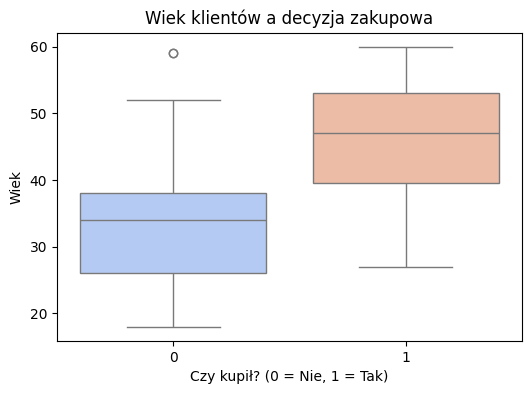

<ipython-input-95-60505ec42413>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Purchased"], y=df["EstimatedSalary"], palette="coolwarm")


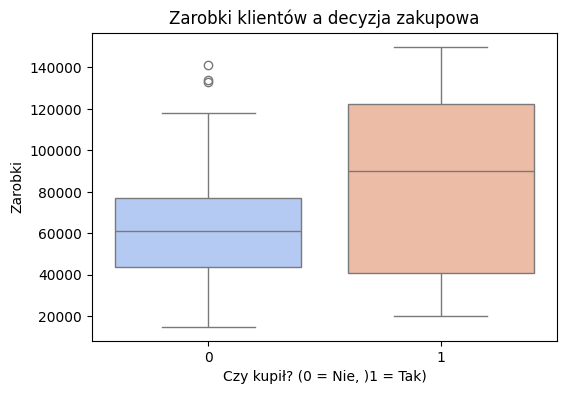

In [95]:
# Boxplot: Wiek vs. Purchased
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Purchased"], y=df["Age"], palette="coolwarm")
plt.title("Wiek klientów a decyzja zakupowa")
plt.xlabel("Czy kupił? (0 = Nie, 1 = Tak)")
plt.ylabel("Wiek")
plt.show()

# Boxplot: Zarobki vs. Purchased
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Purchased"], y=df["EstimatedSalary"], palette="coolwarm")
plt.title("Zarobki klientów a decyzja zakupowa")
plt.xlabel("Czy kupił? (0 = Nie, )1 = Tak)")
plt.ylabel("Zarobki")
plt.show()

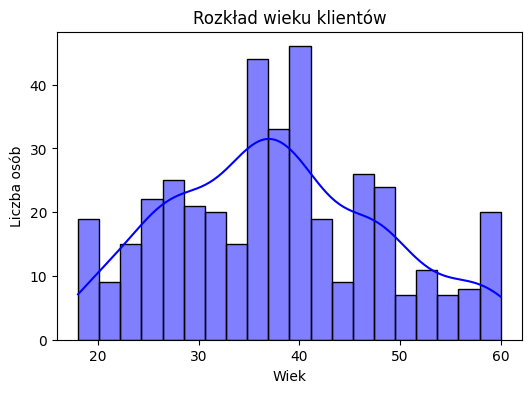

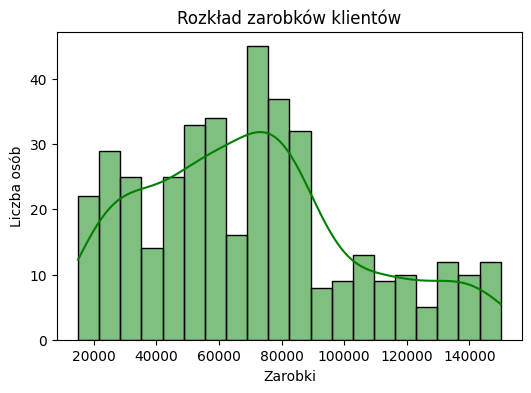

In [96]:
# Rozkład wieku
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Rozkład wieku klientów")
plt.xlabel("Wiek")
plt.ylabel("Liczba osób")
plt.show()

# Rozkład zarobków
plt.figure(figsize=(6,4))
sns.histplot(df["EstimatedSalary"], bins=20, kde=True, color="green")
plt.title("Rozkład zarobków klientów")
plt.xlabel("Zarobki")
plt.ylabel("Liczba osób")
plt.show()

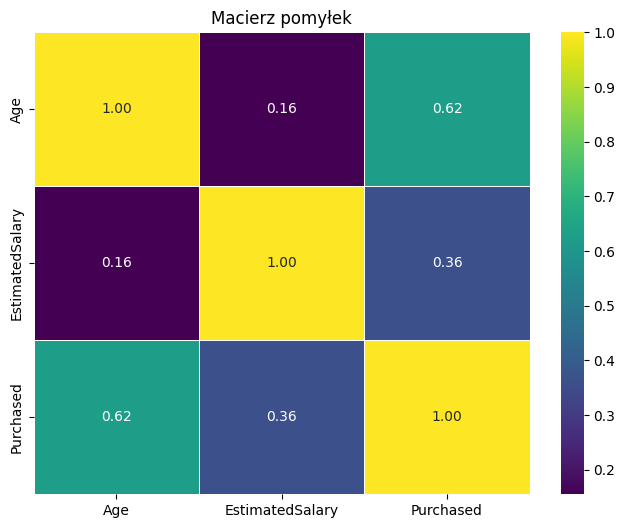

In [97]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Macierz pomyłek")
plt.show()

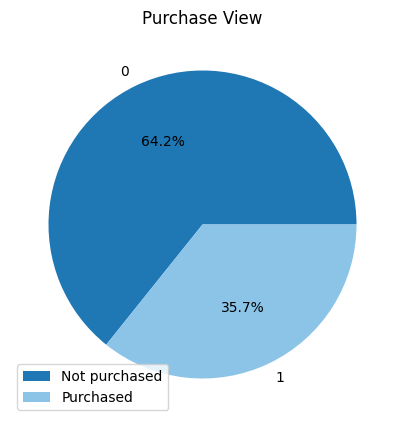

In [98]:
# Liczenie proporcji
purchase_counts = df['Purchased'].value_counts(normalize=True)

# Tworzenie wykresu
plt.figure(figsize=(7,5))
colors = ['#1f77b4', '#8cc4e8']
plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Purchase View")

# Legenda
plt.legend(['Not purchased', 'Purchased'])

# plik PNG
plt.savefig("purchase_pie_chart.png", dpi=300)

# Pokaż wykres
plt.show()

<Figure size 2000x2000 with 0 Axes>

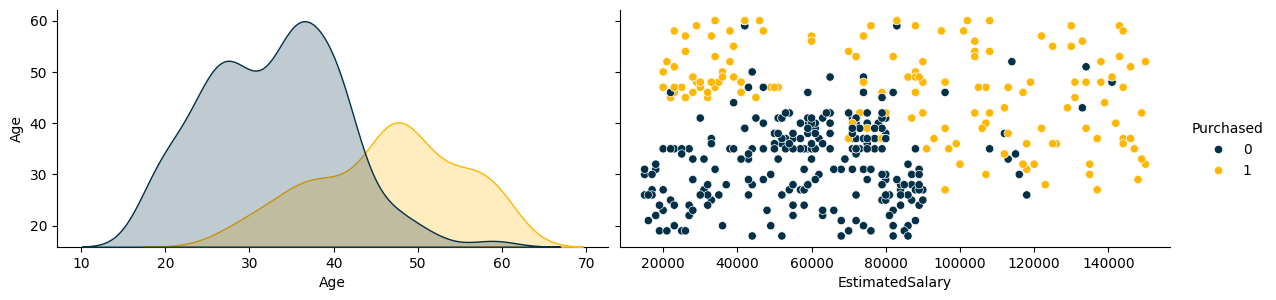

In [99]:
colors = ['#023047','#ffb703']

plt.figure(figsize=(20,20))
pairplot = sns.pairplot(data=df, x_vars= ['Age','EstimatedSalary'], y_vars='Age', hue='Purchased',palette=colors, aspect=2, height=3)

sns.despine(left=False, right=True, top=True, bottom=False)

In [100]:
# Zaczynamy ML
# Podział na cechy i etykiety
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [101]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [102]:
# Standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
# Testujemy kilka modeli
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.8500
Decision Tree Accuracy: 0.9125
Random Forest Accuracy: 0.8875
Gradient Boosting Accuracy: 0.8750


In [104]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"Najlepszy model to: {best_model_name} z dokładnością {results[best_model_name]:.4f}")

Najlepszy model to: Decision Tree z dokładnością 0.9125


In [105]:
# Po Tuningu
# 1. Logistic Regression
logreg_params = {'C': [0.01, 0.1, 1, 10, 100]}
logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)
best_logreg = logreg_grid.best_estimator_

# 2. Decision Tree
dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# 3. Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# 4. Gradient Boosting
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_

# Wyniki po tuningu
print("Tuned Logistic Regression Accuracy:", best_logreg.score(X_test, y_test))
print("Tuned Decision Tree Accuracy:", best_dt.score(X_test, y_test))
print("Tuned Random Forest Accuracy:", best_rf.score(X_test, y_test))
print("Tuned Gradient Boosting Accuracy:", best_gb.score(X_test, y_test))

Tuned Logistic Regression Accuracy: 0.8625
Tuned Decision Tree Accuracy: 0.925
Tuned Random Forest Accuracy: 0.9375
Tuned Gradient Boosting Accuracy: 0.9125


In [106]:
tuned_results = {
    "Logistic Regression": best_logreg.score(X_test, y_test),
    "Decision Tree": best_dt.score(X_test, y_test),
    "Random Forest": best_rf.score(X_test, y_test),
    "Gradient Boosting": best_gb.score(X_test, y_test)
}

# Find the best model
best_model_name_after = max(tuned_results, key=tuned_results.get)

# Display the results
print(f"Najlepszy model po tuningu to: {best_model_name_after} z dokładnością {tuned_results[best_model_name_after]:.4f}")

Najlepszy model po tuningu to: Random Forest z dokładnością 0.9375


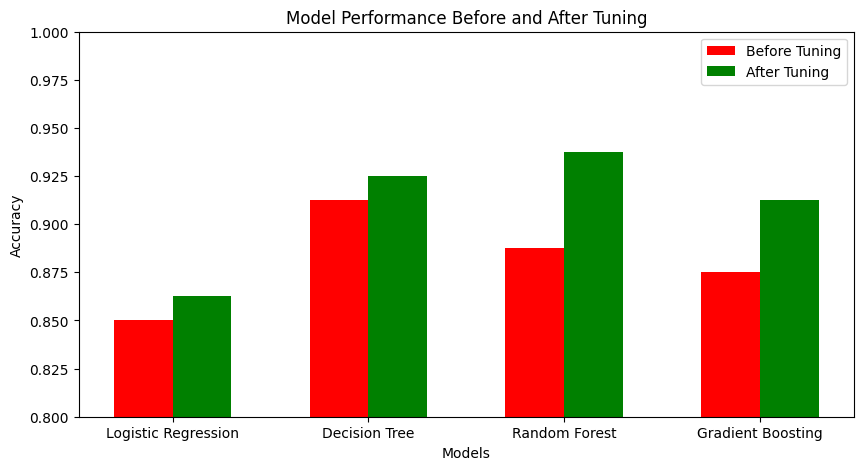

In [107]:
# Wyniki przed tuningu
before_tuning = {
    "Logistic Regression": 0.85,
    "Decision Tree": 0.9125,
    "Random Forest": 0.8875,
    "Gradient Boosting": 0.875
}

# Wyniki po tuningu
after_tuning = {
    "Logistic Regression": 0.8625,
    "Decision Tree": 0.925,
    "Random Forest": 0.9375,
    "Gradient Boosting": 0.9125
}

# Wykres porównawczy
models = list(before_tuning.keys())
before_values = list(before_tuning.values())
after_values = list(after_tuning.values())

x = np.arange(len(models))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, before_values, width, label="Before Tuning", color="red")
ax.bar(x + width/2, after_values, width, label="After Tuning", color="green")

ax.set_xlabel("Models")
ax.set_ylabel("Accuracy")
ax.set_title("Model Performance Before and After Tuning")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.ylim(0.8, 1.0)

# Zapisanie
plt.savefig("model_comparison.png", dpi=300, bbox_inches="tight")
plt.show()

In [108]:
import joblib

# Wybranie najlepszego modelu
joblib.dump(best_rf, "naj_model.pkl")
print("Najlepszy model został zapisany jako 'best_model.pkl'")

Najlepszy model został zapisany jako 'best_model.pkl'
